# 60. 単語ベクトルの読み込みと表示

In [1]:
import gensim

unable to import 'smart_open.gcs', disabling that module


In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('./data/GoogleNews-vectors-negative300.bin', binary=True)

In [3]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度

In [4]:
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件

In [5]:
model.most_similar('United_States')

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

# 63. 加法構成性によるアナロジー

In [6]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

# 64. アナロジーデータでの実験

In [51]:
!cat data/questions-words-original.txt | head

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba
cat: write error: Broken pipe


In [54]:
with open('./data/questions-words-original.txt', mode='r') as in_file:
    with open('./work/questions-words.txt', mode='w') as out_file:
        for data in in_file:
            if data[0] != ':':
                data = data.rstrip('\n')
                splited_data = data.split()
                most_similar_result = model.most_similar(positive=[splited_data[1], splited_data[2]], negative=[splited_data[0]], topn=1)
                data = ' '.join([data, most_similar_result[0][0], str(most_similar_result[0][1])]) + '\n'
            out_file.write(data)

In [1]:
!cat work/questions-words.txt | head

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351871490478516
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777974128723
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460991501808167
cat: write error: Broken pipe


# 65. アナロジータスクでの正解率

In [56]:
from itertools import islice

def calc_correct_answer_rate(data_iter):
    num_correct = 0
    num_data = 0
    for data in data_iter:
        if data[0] == ':': continue
        splited_data = data.split() 
        if splited_data[3] == splited_data[4]: num_correct += 1
        num_data += 1
    return num_correct / num_data
    

with open('./work/questions-words.txt', mode='r') as in_file:
    semantic_analogy_size = 8874
    semantic_analogy_iter = islice(in_file, semantic_analogy_size)
    correct_answer_rate_semantic_analogy = calc_correct_answer_rate(semantic_analogy_iter)
    print(f'correct answer rate(semantic analogy) : {correct_answer_rate_semantic_analogy}')
    syntactic_analogy_size = 10684
    syntactic_analogy_iter = islice(in_file, syntactic_analogy_size)
    correct_answer_rate_syntactic_analogy = calc_correct_answer_rate(syntactic_analogy_iter)
    print(f'correct answer rate(syntactic_analogy): {correct_answer_rate_syntactic_analogy}') 

correct answer rate(semantic analogy) : 0.7308602999210734
correct answer rate(syntactic_analogy): 0.7400468384074942


# 66. WordSimilarity-353での評価

In [57]:
import pandas as pd
import pprint
from scipy.stats import spearmanr

In [58]:
col_names = ['Word1', 'Word2', 'Human']
df = pd.read_csv("./data/wordsim353/combined.csv", encoding="UTF-8", names=col_names)
row_size, _ = df.shape
data_list = [{} for _ in range(row_size - 1)]
for data_name in col_names:
    for idx, frame in enumerate(df[1:][data_name]):
        data_list[idx][data_name] = frame

In [59]:
similarity = list()
human_score = list()
for idx, data in enumerate(data_list):
    word1 = data['Word1']
    word2 = data['Word2']
    similarity.append([word1, word2, model.similarity(word1, word2), idx])
    human_score.append([word1, word2, data['Human'], idx])
sorted_similarity = sorted(similarity, reverse=True, key=lambda x: x[2])
sorted_human_score = sorted(human_score, reverse=True, key=lambda x: x[2])

In [60]:
pprint.pprint(sorted_similarity[:10])
pprint.pprint(sorted_human_score[:10])

[['tiger', 'tiger', 1.0, 2],
 ['Harvard', 'Yale', 0.7817695, 209],
 ['man', 'woman', 0.76640123, 306],
 ['football', 'soccer', 0.73135483, 42],
 ['mile', 'kilometer', 0.7258478, 170],
 ['vodka', 'brandy', 0.6881493, 59],
 ['journey', 'voyage', 0.68308526, 68],
 ['football', 'basketball', 0.66824687, 43],
 ['type', 'kind', 0.66664124, 236],
 ['championship', 'tournament', 0.66553164, 296]]
[['fuck', 'sex', '9.44', 40],
 ['journey', 'voyage', '9.29', 68],
 ['midday', 'noon', '9.29', 73],
 ['dollar', 'buck', '9.22', 266],
 ['money', 'cash', '9.15', 31],
 ['coast', 'shore', '9.10', 70],
 ['money', 'cash', '9.08', 97],
 ['money', 'currency', '9.04', 98],
 ['football', 'soccer', '9.03', 42],
 ['magician', 'wizard', '9.02', 72]]


In [61]:
rank_similarity = [0] * len(sorted_similarity)
for rank, data in enumerate(sorted_similarity):
    rank_similarity[data[3]] = rank + 1
    
rank_human_score = [0] * len(sorted_human_score)
for rank, data in enumerate(sorted_human_score):
    rank_human_score[data[3]] = rank + 1

correlation, pvalue = spearmanr(rank_similarity, rank_human_score)

In [62]:
print(correlation, pvalue)

0.6848782939104398 3.449094093160346e-50


# 67. k-meansクラスタリング

In [68]:
!cut -f 1 < ./data/country-data-wiki.txt > ./work/country-names.txt

In [80]:
country_list = list()
country_vec = list()
with open('./work/country-names.txt', mode='r') as in_file:
    for data in in_file:
        data = data.strip()
        data = data.replace(' ', '_')
        try:
            country_vec.append(model[data])
            country_list.append(data)
        except KeyError:
            pass

In [81]:
print(len(country_list))

197


In [82]:
import numpy as np
from sklearn.cluster import KMeans

In [83]:
result_pred = KMeans(n_clusters = 5).fit_predict(country_vec)
for (country, pred) in zip(country_list, result_pred):
    print(country, pred)

Afghanistan 0
Åland_Islands 2
Albania 2
Algeria 3
Andorra 2
Angola 3
Anguilla 1
Antarctica 1
Argentina 2
Armenia 2
Aruba 1
Australia 0
Austria 2
Azerbaijan 2
Bahamas 1
Bahrain 0
Bangladesh 0
Barbados 1
Belarus 2
Belgium 2
Belize 1
Benin 3
Bermuda 1
Bhutan 0
Botswana 3
Bouvet_Island 1
Brazil 1
Brunei_Darussalam 0
Bulgaria 2
Burkina_Faso 3
Burundi 3
Cabo_Verde 1
Cambodia 0
Cameroon 3
Canada 1
Cayman_Islands 1
Chad 1
Chile 1
China 0
Colombia 1
Comoros 3
Congo 3
Cook_Islands 4
Costa_Rica 1
Croatia 2
Cuba 1
Curaçao 1
Cyprus 2
Czechia 2
Denmark 2
Djibouti 3
Dominica 1
Dominican_Republic 1
Ecuador 1
Egypt 0
El_Salvador 1
Equatorial_Guinea 3
Eritrea 3
Estonia 2
Ethiopia 3
Faroe_Islands 2
Fiji 4
Finland 2
France 2
French_Guiana 1
French_Polynesia 4
Gabon 3
Gambia 3
Georgia 2
Germany 2
Ghana 3
Gibraltar 1
Greece 2
Greenland 1
Grenada 1
Guadeloupe 1
Guam 4
Guatemala 1
Guernsey 1
Guinea 3
Guyana 1
Haiti 1
Holy_See 2
Honduras 1
Hong_Kong 0
Hungary 2
Iceland 2
India 0
Indonesia 0
Iraq 0
Ireland 2
Is

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from random import randint

class myKMeans(BaseEstimator, ClusterMixin):

    def __init__(self, n_clusters=2, max_iter=10, random_state=False, init='random',
               algorithm = 'full', n_init=10, n_jobs=1, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.init = init #実装してない
        self.algorithm = algorithm #実装してない
        self.n_init = n_init
        self.tol = tol
        self.n_jobs = n_jobs #実装してない
        self.verbose = verbose #実装してない

    def fit(self, X, y=None):
        self.inertia_ = np.inf
        for iter in range(self.n_init):
            if self.random_state==False:
                np.random.seed(seed=1)
            cluster_centers = None
            n_iter = None
            inertia = np.inf
            #初期化はラベルをランダムで振り分ける(実装によっては重心を要素の中から決める方法もある)
            now_pred = np.random.randint(0, self.n_clusters, len(X))
            for _ in range(self.max_iter):
                cluster_centers = np.array([X[now_pred == i].mean(axis=0)
                    for i in range(self.n_clusters)])
                new_pred = np.array([
                    np.array([
                        self.distance_(p, centroid)
                            for centroid in cluster_centers
                    ]).argmin()
                    for p in X
                ])
                new_inertia = np.sum(
                    np.array([
                        np.array([
                            self.distance_(p, centroid)
                                for centroid in cluster_centers
                            ]).min()
                        for p in X
                    ])
                )

                if abs(new_inertia - inertia) < self.tol:
                    n_iter = _
                    break
                inertia = new_inertia
                now_pred = new_pred

            if self.inertia_ > inertia:
                self.n_iter_ = n_iter
                self.inertia_ = inertia
                self.labels_ = now_pred
                self.cluster_centers_ = cluster_centers
        return self.labels_

    def distance_(self, a, b):
        return np.sum((a - b) ** 2)

In [ ]:
my_kmeans = myKMeans(n_clusters = 5)
my_result_pred = my_kmeans.fit_predict(np.array(country_vec))

# 68. Ward法によるクラスタリング

In [84]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [85]:
Z = linkage(country_vec, method='ward', metric='euclidean')

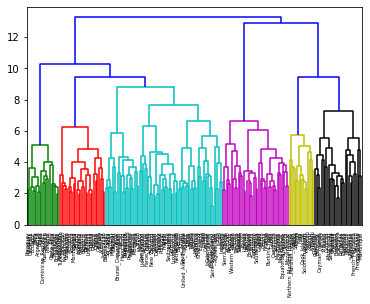

In [86]:
plt.figure()
dendrogram(Z, labels = country_list)
plt.show()

# 69. t-SNEによる可視化

In [88]:
from sklearn.manifold import TSNE

In [90]:
X_embedded = TSNE(n_components=2).fit_transform(country_vec)
X_embedded.shape

(197, 2)

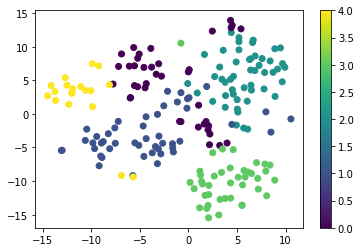

In [91]:
plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = result_pred)
plt.colorbar()
plt.show()